In [1]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 63.3 MB/s eta 0:00:00


In [2]:
pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13818 sha256=53a7792af732782bb7ed6a8ea9e52939bb0c2078b7b3e312de309ca561c9ee0f
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


In [3]:
# loading libraries
import pandas as pd
import pubchempy as pcp
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import MolsToGridImage
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**ACTIVITY**

RDkit

Generating molecules from SMILES code – MolFromSMILES

```mol = Chem.MolFromSmiles(s)```

Here are some examples of SMILES code for simple molecules:

Methane: CH4 or C

Ethanol: CCO

Benzene: c1ccccc1 (c for aromatic carbon)

Acetylene: C#C

Water: O

Ammonia: N

Carbon dioxide: O=C=O


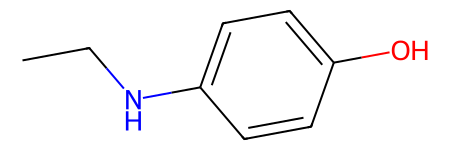

In [4]:
s = 'CCNC1=CC=C(C=C1)O'
mol = Chem.MolFromSmiles(s)
mol

Generate MORGAN and MACCS fingerprint from a molecule of interest

```
MACCSkeys.GenMACCSKeys(mol)
maccs_keys.ToBitString()
```

```
s = 'CC(=O)OC1=CC=CC=C1C(=O)O'
mol = Chem.MolFromSmiles(s)
bi = {}
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bi)
print( morgan_fp.ToBitString() )
print( bi )
Draw.DrawMorganBit(mol,389,bi)
```

Caffeine

Aspirin

Paracetamol

Etc.

(First, obtain SMILES code from pubchem)


{33: ((4, 2),), 314: ((7, 1), (10, 1)), 378: ((3, 0),), 400: ((9, 2),), 463: ((1, 2),), 504: ((6, 1),), 564: ((8, 1), (11, 1)), 650: ((7, 0), (10, 0)), 771: ((9, 1),), 932: ((2, 1),), 935: ((1, 0), (8, 0), (11, 0)), 1024: ((11, 2),), 1057: ((0, 0), (12, 0), (13, 0)), 1145: ((0, 1), (12, 1), (13, 1)), 1203: ((3, 2),), 1258: ((8, 2),), 1307: ((6, 2),), 1354: ((5, 2),), 1380: ((4, 0), (5, 0), (6, 0), (9, 0)), 1409: ((1, 1),), 1440: ((5, 1),), 1452: ((3, 1),), 1517: ((2, 2),), 1696: ((4, 1),), 1873: ((2, 0),)}


[12:49:25] DEPRECATION WARNING: please use MorganGenerator


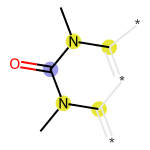

In [5]:
s = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
mol = Chem.MolFromSmiles(s)
maccs_keys = MACCSkeys.GenMACCSKeys(mol)
#maccs_keys.ToBitString()
bi = {}
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bi)
#print( morgan_fp.ToBitString() )
print( bi )
Draw.DrawMorganBit(mol,400,bi)

In [6]:
bi[33]

((4, 2),)

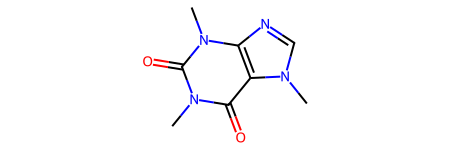

In [8]:
mol

In [7]:
maccs_keys.ToBitString()

'00000000000000000000000000000000000001100000000000000000000000000100000000010101100101000100110111100100011000100100010011100101000000001100011110001110001010111111110'

In [9]:
morgan_fp.ToBitString()

'000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000100000000000000000000010000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001001000000000000000000000000000000000000000000000000000000000000000

**AFTERNOON ACTIVITY**

In [10]:
# loading dataset (Ref: pubchem - AChE gene)
from google.colab import drive
drive.mount('/content/drive')

# train set
!gdown --id 1StQorqPwqW2xFmxUopU-wK1q6rdpMtaS

# test set
!gdown --id 1SuaLyT8X7Y9tWie0SglB2Pj-e6BToDQ_

Mounted at /content/drive
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1StQorqPwqW2xFmxUopU-wK1q6rdpMtaS
To: /content/dataset-train.csv
100% 2.00M/2.00M [00:00<00:00, 14.8MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SuaLyT8X7Y9tWie0SglB2Pj-e6BToDQ_
To: /content/dataset-test.csv
100% 399k/399k [00:00<00:00, 5.42MB/s]


In [11]:
df = pd.read_csv('dataset-train.csv')
df

,baid,activity,aid,sid,mid,cid,geneid,taxid,pmid,aidtype,...,acname,acvalue,aidsrcname,aidname,cmpdname,targetname,targeturl,ecs,repacxn,smiles
0,458198228,Inactive,1347399,144212056,0,16541,43,9606,NaN,Confirmatory,...,Potency,NaN,Tox21,Acetylcholinesterase (AChE) small molecule ant...,Decyl acrylate,ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,NaN,P22303,CCCCCCCCCCOC(=O)C=C
1,104740830,Active,304405,103536907,0,24749809,43,9606,18047264.0,Confirmatory,...,IC50,0.00183,ChEMBL,Inhibition of human serum recombinant AChE by ...,"1,7-Bis(5,6,7,8-tetrahydroacridin-9-ylamino)he...",ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,3.1.1.7,P22303,C1CCC2=NC3=CC=CC=C3C(=C2C1)NCCCC(=O)CCCNC4=C5C...
2,103174244,Active,31162,103292861,0,44320394,43,9606,12182862.0,Confirmatory,...,IC50,1.00000,ChEMBL,Concentration required for the inhibition of a...,"1-[4-(Methoxycarbonyl)benzyl]-4-[3-oxo-3-(5,6-...",ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,3.1.1.7,P22303,COC1=C(C=C2C(=C1)C=C(S2)C(=O)CCC3=CC=[N+](C=C3...
3,303500299,Active,482894,103455001,0,249597,43,9606,20053484.0,Confirmatory,...,IC50,0.62000,ChEMBL,Inhibition of AChE,4-{2-[3-(4-Hydroxyphenyl)-4-methylcyclohexyl]p...,ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,3.1.1.7,P22303,CC1CCC(CC1C2=CC=C(C=C2)O)C(C)CC3=CC=C(C=C3)O
4,458192542,Inactive,1347399,144211379,0,61510,43,9606,NaN,Confirmatory,...,Potency,NaN,Tox21,Acetylcholinesterase (AChE) small molecule ant...,Ytterbium chloride (YbCl3),ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,NaN,P22303,Cl[Yb](Cl)Cl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,459156554,Active,1379560,404693059,0,145977433,43,9606,28923380.0,Confirmatory,...,IC50,0.02590,ChEMBL,Inhibition of human AChE pre-incubated for 6 m...,Chembl4207386,ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,3.1.1.7,P22303,CC(=CCNCC(=O)NC1=CC2=C(C=C1)N=C3CCCN3C2=O)C
4996,458257580,Inactive,1347399,170465321,0,3341,43,9606,NaN,Confirmatory,...,Potency,NaN,Tox21,Acetylcholinesterase (AChE) small molecule ant...,Fenoldopam,ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,NaN,P22303,C1CNCC(C2=CC(=C(C(=C21)Cl)O)O)C3=CC=C(C=C3)O
4997,458249820,Inactive,1347399,144210425,0,3314,43,9606,NaN,Confirmatory,...,Potency,NaN,Tox21,Acetylcholinesterase (AChE) small molecule ant...,Eugenol,ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,NaN,P22303,COC1=C(C=CC(=C1)CC=C)O
4998,458199338,Inactive,1347399,144207926,0,13436,43,9606,NaN,Confirmatory,...,Potency,NaN,Tox21,Acetylcholinesterase (AChE) small molecule ant...,Diphenyl disulfide,ACHE - acetylcholinesterase (Cartwright blood ...,/gene/43,NaN,P22303,C1=CC=C(C=C1)SSC2=CC=CC=C2


**MACCS Fingerprint**

In [12]:
activity_map = {'Active':0,'Inactive':1}
classes = np.array([activity_map[Activity] for Activity in df.activity])
classes

array([1, 0, 0, ..., 1, 1, 0])

In [13]:
df['smiles']

,smiles
0,CCCCCCCCCCOC(=O)C=C
1,C1CCC2=NC3=CC=CC=C3C(=C2C1)NCCCC(=O)CCCNC4=C5C...
2,COC1=C(C=C2C(=C1)C=C(S2)C(=O)CCC3=CC=[N+](C=C3...
3,CC1CCC(CC1C2=CC=C(C=C2)O)C(C)CC3=CC=C(C=C3)O
4,Cl[Yb](Cl)Cl
...,...
4995,CC(=CCNCC(=O)NC1=CC2=C(C=C1)N=C3CCCN3C2=O)C
4996,C1CNCC(C2=CC(=C(C(=C21)Cl)O)O)C3=CC=C(C=C3)O
4997,COC1=C(C=CC(=C1)CC=C)O
4998,C1=CC=C(C=C1)SSC2=CC=CC=C2


In [14]:
df = pd.read_csv('dataset-train.csv')

# class vector
activity_map = {'Active':0,'Inactive':1}
classes = np.array([activity_map[Activity] for Activity in df.activity])

# MACCS feature extraction
smiles = df['smiles']
MACCS = []
for s in smiles:
  mol = Chem.MolFromSmiles(s)
  maccs_keys = MACCSkeys.GenMACCSKeys(mol)
  MACCS.append( [int(bit) for bit in maccs_keys.ToBitString()] )
MACCS_array = np.array(MACCS)

In [15]:
MACCS_array

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [16]:
np.shape(MACCS_array)

(5000, 167)

**Random Forest Classifier**

In [17]:
# Split the dataset into training and testing sets
X = MACCS_array
y = classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get the names of the top important features (e.g., top 5)
top_features = sorted_indices[:20]

# Print the top important features and their importances
print("Top 20 Important Fingerprint(Features):")
for i in top_features:
    print("Feature "+str(i)+' '+MACCSkeys.smartsPatts[i][0]+": Importance = %.4f"%importances[i])


Accuracy: 93.40%
Top 20 Important Fingerprint(Features):
Feature 145 *1~*~*~*~*~*~1: Importance = 0.0473
Feature 101 [$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1),$([R]@1@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]@[R]1)]: Importance = 0.0408
Feature 105 *@*(@*)@*: Importance = 0.0366
Feature 125 ?: Importance = 0.0358
Feature 100 *~[CH2]~[#7]: Importance = 0.0331
Feature 85 [#6]~[#7](~[#6])~[#6]: Importance = 0.0300
Feature 137 [!C;!c;R]: Importance = 0.0284
Feature 122 *~[#7](~*)~*: Importance = 0.0268
Feature 111 [#7]~*~[CH2]~*: Importance = 0.0262
Feature 142 [#7]: Importance = 0.0257
Feature 128 [$(*~[CH2]~*~*~*~[CH2]~*),$([R]1@[CH2;R]@[R]@[R]@[R]@[CH2;R]1),$(*~[CH2]~[R]1@[R]@[R]@[CH2;R]1),$(*~[CH2]~*~[R]1@[R]@[CH2;R]1)]: Importance = 0.0

In [18]:
top_features

array([145, 101, 105, 125, 100,  85, 137, 122, 111, 142, 128, 158, 118,
       121, 162, 161,  98, 147, 139,  93])

**Neural Network Classifier**

In [19]:
# Dataset with MACCS features
X = MACCS_array
y = classes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple binary classification model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(167,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 100
model.fit(X_train, y_train, epochs=num_epochs, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7468 - loss: 0.5097
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8958 - loss: 0.2852
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9152 - loss: 0.2282
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9156 - loss: 0.2317
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9260 - loss: 0.2049
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9306 - loss: 0.1905
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9340 - loss: 0.1864
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9407 - loss: 0.1657
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.1522
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9509 - loss: 0.1466
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9570 - loss: 0.1289
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━

**Morgan Fingerprint**

In [20]:
mol = Chem.MolFromSmiles(smiles[0])
AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048).ToBitString()

[12:51:01] DEPRECATION WARNING: please use MorganGenerator


'000000000000010000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000

In [21]:
df = pd.read_csv('dataset-train.csv')

# class vector
activity_map = {'Active':0,'Inactive':1}
classes = np.array([activity_map[Activity] for Activity in df.activity])

# MACCS feature extraction
smiles = df['smiles']
MORGAN = []
#bitInfo_list = []
for s in smiles:
  mol = Chem.MolFromSmiles(s)
  #bi = {}
  morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bi)
  #bitInfo_list.append( bi )
  MORGAN.append( [int(bit) for bit in morgan_fp.ToBitString()] )
MORGAN_array = np.array(MORGAN)

[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerator
[12:53:19] DEPRECATION WARNING: please use MorganGenerat

In [22]:
MORGAN_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [23]:
np.shape(MORGAN_array)

(5000, 2048)

In [24]:
# Split the dataset into training and testing sets
X = MORGAN_array
y = classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Get feature importances
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get the names of the top important features (e.g., top 5)
top_features = sorted_indices[:20]



Accuracy: 95.60%


In [25]:
importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

sorted_indices

array([1750, 1380, 1855, ...,    3,  134,   68])

[12:53:32] DEPRECATION WARNING: please use MorganGenerator


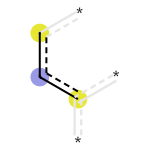

In [26]:
mol = Chem.MolFromSmiles(smiles[1])
morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=bi)
Draw.DrawMorganBit(mol,1750,bi)

In [27]:
# Dataset with MORGAN features
X = MORGAN_array
y = classes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple binary classification model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2048,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 100
model.fit(X_train, y_train, epochs=num_epochs, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7933 - loss: 0.4512
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.1365
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9852 - loss: 0.0661
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0422
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 0.0325
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 0.0235
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9955 - loss: 0.0190
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9970 - loss: 0.0154
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0106
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.0116
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0078
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━